In [1]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"



In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd



In [3]:
from tempfile import mkdtemp
from joblib import Memory, dump, load



In [4]:
import sqlite3
import json



In [5]:
with open(r"C:\Users\saurabhr2\OneDrive - CitiusTech Healthcare Technology Pvt. Ltd\Data Science with Python\Project\cms-hospital-readmission\config.json", "r") as f:
    config = json.load(f)



In [6]:
for dictionary in config:
    dictionary.items()



dict_items([('threshold_nan', 0.4)])

dict_items([('database_path', '..\\database\\cms_data.db'), ('prvdr_category_file', '../provider_category.csv'), ('icd9_procedure_code_category_file', '../ICD 9 Procedural Code Mapping.csv'), ('hcpcs_code_category_file', '../hcpcs-code-categories.csv'), ('eda_report_location', '..\\output\\eda_report'), ('model_repository_location', '..\\models')])

dict_items([('ICD9_DIAGNOSIS_CODE_CATEGORY_URL', 'https://icd.codes/icd9cm'), ('HCPCS_CATEGORY_URL', 'https://www.hcpcsdata.com/Codes')])

dict_items([('HIGH_CARDINALITY_THRESHOLD', 4), ('INFREQUENT_CATEGORY_CUT_OFF', 200), ('DEFAULT_INFREQUENT_CATEGORY_CUT_OFF', 10), ('INFREQUENT_CATEGORY_LABEL', 'Infrequent'), ('DEFAULT_INFREQUENT_CATEGORY_LABEL', 'OTHERS'), ('RANDOM_STATE', 420), ('STATISTICAL_TEST_ALPHA', 0.05), ('TEST_SIZE_FOR_SPLIT', 0.2), ('MISSING_VALUE_LABEL', 'Missing')])

In [7]:
# constant variables
TEST_SIZE_FOR_SPLIT = config[3]["TEST_SIZE_FOR_SPLIT"]
INFREQUENT_CATEGORY_CUT_OFF = config[3]["INFREQUENT_CATEGORY_CUT_OFF"]
INFREQUENT_CATEGORY_LABEL = config[3]["INFREQUENT_CATEGORY_LABEL"]
RANDOM_STATE = config[3]["RANDOM_STATE"]
MISSING_VALUE_LABEL = config[3]["MISSING_VALUE_LABEL"]
EDA_REPORT_LOCATION = config[1]["eda_report_location"]
MODEL_REPOSITORY_LOCATION = config[1]["model_repository_location"]



In [8]:
# import os

# cd_path = os.path.dirname(os.path.realpath(__file__))
# os.chdir(cd_path)



In [9]:
from StatisticalTest import ChiSquare
from CustomPipeline import (
    CardinalityReducer,
    get_ct_feature_names,
    SelectColumnsTransfomer,
)
from feature_importance import FeatureImportance



In [10]:
from imblearn import pipeline as imb_pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler



In [11]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    classification_report,
    f1_score,
    confusion_matrix,
    roc_auc_score,
)



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    VotingClassifier,
    BaggingClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV



In [13]:
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    StandardScaler,
    OrdinalEncoder,
)



In [14]:
conn_object = sqlite3.connect("../database/cms_data.db")



In [15]:
query_string = """SELECT inp.DESYNPUF_ID, inp.CLM_FROM_DT AS CLM_FROM_DT_INP, inp.CLM_THRU_DT AS CLM_THRU_DT_INP, inp.PRVDR_NUM AS PRVDR_NUM_INP, inp.CLM_PMT_AMT AS CLM_PMT_AMT_INP, inp.NCH_PRMRY_PYR_CLM_PD_AMT AS NCH_PRMRY_PYR_CLM_PD_AMT_INP, inp.AT_PHYSN_NPI AS AT_PHYSN_NPI_INP, inp.OP_PHYSN_NPI AS OP_PHYSN_NPI_INP, inp.CLM_ADMSN_DT AS CLM_ADMSN_DT_INP, inp.CLM_PASS_THRU_PER_DIEM_AMT AS CLM_PASS_THRU_PER_DIEM_AMT_INP, inp.NCH_BENE_IP_DDCTBL_AMT AS NCH_BENE_IP_DDCTBL_AMT_INP, inp.NCH_BENE_PTA_COINSRNC_LBLTY_AM AS NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP, inp.NCH_BENE_BLOOD_DDCTBL_LBLTY_AM AS NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP, inp.CLM_UTLZTN_DAY_CNT AS CLM_UTLZTN_DAY_CNT_INP, inp.NCH_BENE_DSCHRG_DT AS NCH_BENE_DSCHRG_DT_INP, inp.CLM_DRG_CD AS CLM_DRG_CD_INP, inp.PRVDR_NUM_CAT AS PRVDR_NUM_CAT_INP, inp.Next_CLM_ADMSN_DT AS Next_CLM_ADMSN_DT_INP, 
inp.Readmission_within_30days AS Readmission_within_30days_INP, inp.CLAIM_YEAR AS CLAIM_YEAR_INP, inp.ADMTNG_ICD9_DGNS_CD_CAT AS ADMTNG_ICD9_DGNS_CD_CAT_INP, inp.ICD9_DGNS_CD_1_CAT AS ICD9_DGNS_CD_1_CAT_INP, inp.ICD9_DGNS_CD_2_CAT AS ICD9_DGNS_CD_2_CAT_INP, inp.ICD9_DGNS_CD_3_CAT AS ICD9_DGNS_CD_3_CAT_INP, inp.ICD9_DGNS_CD_4_CAT AS ICD9_DGNS_CD_4_CAT_INP, 
inp.ICD9_DGNS_CD_5_CAT AS ICD9_DGNS_CD_5_CAT_INP, inp.ICD9_DGNS_CD_6_CAT AS ICD9_DGNS_CD_6_CAT_INP, inp.ICD9_DGNS_CD_7_CAT AS ICD9_DGNS_CD_7_CAT_INP, inp.ICD9_DGNS_CD_8_CAT AS ICD9_DGNS_CD_8_CAT_INP, inp.ICD9_DGNS_CD_9_CAT AS ICD9_DGNS_CD_9_CAT_INP, inp.ICD9_PRCDR_CD_1_CAT AS ICD9_PRCDR_CD_1_CAT_INP
FROM Inpatient_claims_2 inp
"""



In [16]:
claim_data = pd.read_sql_query(
    query_string,
    con=conn_object,
    parse_dates={
        "CLM_FROM_DT_INP": {"format": "%Y-%m-%d"},
        "CLM_THRU_DT_INP": {"format": "%Y-%m-%d"},
        "CLM_ADMSN_DT_INP": {"format": "%Y-%m-%d"},
        "NCH_BENE_DSCHRG_DT_INP": {"format": "%Y-%m-%d"},
        "Next_CLM_ADMSN_DT_INP": {"format": "%Y-%m-%d"},
        # "CLM_FROM_DT_OUT": {"format": "%Y-%m-%d"},
        # "CLM_THRU_DT_OUT": {"format": "%Y-%m-%d"},
    },
)



In [17]:
claim_data.head()



,DESYNPUF_ID,CLM_FROM_DT_INP,CLM_THRU_DT_INP,PRVDR_NUM_INP,CLM_PMT_AMT_INP,NCH_PRMRY_PYR_CLM_PD_AMT_INP,AT_PHYSN_NPI_INP,OP_PHYSN_NPI_INP,CLM_ADMSN_DT_INP,CLM_PASS_THRU_PER_DIEM_AMT_INP,...,ICD9_DGNS_CD_1_CAT_INP,ICD9_DGNS_CD_2_CAT_INP,ICD9_DGNS_CD_3_CAT_INP,ICD9_DGNS_CD_4_CAT_INP,ICD9_DGNS_CD_5_CAT_INP,ICD9_DGNS_CD_6_CAT_INP,ICD9_DGNS_CD_7_CAT_INP,ICD9_DGNS_CD_8_CAT_INP,ICD9_DGNS_CD_9_CAT_INP,ICD9_PRCDR_CD_1_CAT_INP
0,00000B48BCF4AD29,2008-07-07,2008-07-18,1000GD,57000.0,0.0,1.219278e+09,7.451661e+09,2008-07-07,0.0,...,390-459,240-279,780-799,240-279,390-459,240-279,390-459,390-459,460-519,35-39
1,00000B48BCF4AD29,2008-07-24,2008-07-26,1030RD,0.0,0.0,9.812675e+09,NaN,2008-07-24,0.0,...,390-459,280-289,460-519,520-579,390-459,V01-V91,290-319,240-279,390-459,None
2,00009C897C3D8372,2008-03-29,2008-04-03,0700QA,9000.0,0.0,4.123725e+09,NaN,2008-03-29,0.0,...,460-519,460-519,460-519,240-279,460-519,240-279,460-519,390-459,580-629,None
3,00009C897C3D8372,2008-04-15,2008-04-16,0700QA,10000.0,0.0,4.123725e+09,NaN,2008-04-15,0.0,...,001-139,580-629,460-519,320-389,680-709,240-279,390-459,320-389,240-279,None
4,0008148FCB4CB644,2009-12-11,2009-12-23,1401RR,28000.0,0.0,7.872370e+09,5.118340e+09,2009-12-11,400.0,...,240-279,320-389,240-279,320-389,V01-V91,290-319,580-629,800-999,390-459,55-59


In [18]:
claim_data.columns



Index(['DESYNPUF_ID', 'CLM_FROM_DT_INP', 'CLM_THRU_DT_INP', 'PRVDR_NUM_INP',
       'CLM_PMT_AMT_INP', 'NCH_PRMRY_PYR_CLM_PD_AMT_INP', 'AT_PHYSN_NPI_INP',
       'OP_PHYSN_NPI_INP', 'CLM_ADMSN_DT_INP',
       'CLM_PASS_THRU_PER_DIEM_AMT_INP', 'NCH_BENE_IP_DDCTBL_AMT_INP',
       'NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP',
       'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP', 'CLM_UTLZTN_DAY_CNT_INP',
       'NCH_BENE_DSCHRG_DT_INP', 'CLM_DRG_CD_INP', 'PRVDR_NUM_CAT_INP',
       'Next_CLM_ADMSN_DT_INP', 'Readmission_within_30days_INP',
       'CLAIM_YEAR_INP', 'ADMTNG_ICD9_DGNS_CD_CAT_INP',
       'ICD9_DGNS_CD_1_CAT_INP', 'ICD9_DGNS_CD_2_CAT_INP',
       'ICD9_DGNS_CD_3_CAT_INP', 'ICD9_DGNS_CD_4_CAT_INP',
       'ICD9_DGNS_CD_5_CAT_INP', 'ICD9_DGNS_CD_6_CAT_INP',
       'ICD9_DGNS_CD_7_CAT_INP', 'ICD9_DGNS_CD_8_CAT_INP',
       'ICD9_DGNS_CD_9_CAT_INP', 'ICD9_PRCDR_CD_1_CAT_INP'],
      dtype='object')

In [19]:
claim_data["Readmission_within_30days_INP"].value_counts() / claim_data.shape[0]



0    0.866479
1    0.133521
Name: Readmission_within_30days_INP, dtype: float64

In [20]:
# claim_data = claim_data[(claim_data['NCH_BENE_DSCHRG_DT_INP'] <= claim_data['CLM_FROM_DT_OUT']) & (claim_data['CLM_FROM_DT_OUT'] <= claim_data['Next_CLM_ADMSN_DT_INP'])]



In [21]:
claim_data.dtypes



DESYNPUF_ID                                   object
CLM_FROM_DT_INP                       datetime64[ns]
CLM_THRU_DT_INP                       datetime64[ns]
PRVDR_NUM_INP                                 object
CLM_PMT_AMT_INP                              float64
NCH_PRMRY_PYR_CLM_PD_AMT_INP                 float64
AT_PHYSN_NPI_INP                             float64
OP_PHYSN_NPI_INP                             float64
CLM_ADMSN_DT_INP                      datetime64[ns]
CLM_PASS_THRU_PER_DIEM_AMT_INP               float64
NCH_BENE_IP_DDCTBL_AMT_INP                   float64
NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP           float64
NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP           float64
CLM_UTLZTN_DAY_CNT_INP                       float64
NCH_BENE_DSCHRG_DT_INP                datetime64[ns]
CLM_DRG_CD_INP                                object
PRVDR_NUM_CAT_INP                             object
Next_CLM_ADMSN_DT_INP                 datetime64[ns]
Readmission_within_30days_INP                 

In [22]:
claim_data.shape



(46180, 31)

In [23]:
beneficiary_summary_2 = pd.read_sql_query(
    "select * from Beneficiary_Data_2",
    con=conn_object,
    parse_dates=["BENE_BIRTH_DT", "BENE_DEATH_DT"],
)



In [24]:
beneficiary_summary_2.shape



(343858, 33)

In [25]:
beneficiary_summary_2.dtypes



DESYNPUF_ID                         object
BENE_BIRTH_DT               datetime64[ns]
BENE_DEATH_DT               datetime64[ns]
BENE_SEX_IDENT_CD                    int64
BENE_RACE_CD                         int64
BENE_ESRD_IND                       object
BENE_HI_CVRAGE_TOT_MONS              int64
BENE_SMI_CVRAGE_TOT_MONS             int64
BENE_HMO_CVRAGE_TOT_MONS             int64
PLAN_CVRG_MOS_NUM                    int64
SP_ALZHDMTA                          int64
SP_CHF                               int64
SP_CHRNKIDN                          int64
SP_CNCR                              int64
SP_COPD                              int64
SP_DEPRESSN                          int64
SP_DIABETES                          int64
SP_ISCHMCHT                          int64
SP_OSTEOPRS                          int64
SP_RA_OA                             int64
SP_STRKETIA                          int64
MEDREIMB_IP                        float64
BENRES_IP                          float64
PPPYMT_IP  

In [26]:
final_df = pd.merge(
    left=beneficiary_summary_2,
    right=claim_data,
    left_on=["DESYNPUF_ID", "Year"],
    right_on=["DESYNPUF_ID", "CLAIM_YEAR_INP"],
    how="inner",
)



In [27]:
final_df.head()



,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,...,ICD9_DGNS_CD_1_CAT_INP,ICD9_DGNS_CD_2_CAT_INP,ICD9_DGNS_CD_3_CAT_INP,ICD9_DGNS_CD_4_CAT_INP,ICD9_DGNS_CD_5_CAT_INP,ICD9_DGNS_CD_6_CAT_INP,ICD9_DGNS_CD_7_CAT_INP,ICD9_DGNS_CD_8_CAT_INP,ICD9_DGNS_CD_9_CAT_INP,ICD9_PRCDR_CD_1_CAT_INP
0,00000B48BCF4AD29,1923-09-01,NaT,2,5,0,12,12,0,0,...,390-459,240-279,780-799,240-279,390-459,240-279,390-459,390-459,460-519,35-39
1,00000B48BCF4AD29,1923-09-01,NaT,2,5,0,12,12,0,0,...,390-459,280-289,460-519,520-579,390-459,V01-V91,290-319,240-279,390-459,None
2,0000525AB30E4DEF,1920-10-01,NaT,2,1,0,12,12,0,12,...,520-579,390-459,V01-V91,V01-V91,780-799,240-279,520-579,460-519,520-579,87-99
3,0000525AB30E4DEF,1920-10-01,NaT,2,1,0,12,12,0,12,...,520-579,V01-V91,580-629,800-999,390-459,390-459,780-799,520-579,780-799,35-39
4,00009C897C3D8372,1932-01-01,NaT,1,1,Y,12,12,12,12,...,460-519,460-519,460-519,240-279,460-519,240-279,460-519,390-459,580-629,None


In [28]:
final_df["Readmission_within_30days_INP"].value_counts() / final_df.shape[0]



0    0.866764
1    0.133236
Name: Readmission_within_30days_INP, dtype: float64

In [29]:
categorical_features = [
    "BENE_SEX_IDENT_CD",
    "BENE_RACE_CD",
    "BENE_ESRD_IND",
    "SP_ALZHDMTA",
    "SP_CHF",
    "SP_CHRNKIDN",
    "SP_CNCR",
    "SP_COPD",
    "SP_DEPRESSN",
    "SP_DIABETES",
    "SP_ISCHMCHT",
    "SP_OSTEOPRS",
    "SP_RA_OA",
    "SP_STRKETIA",
    "BENE_STATE_COUNTY_CODE",
    "PRVDR_NUM_CAT_INP",
    "ADMTNG_ICD9_DGNS_CD_CAT_INP",
    "ICD9_DGNS_CD_1_CAT_INP",
    "ICD9_DGNS_CD_2_CAT_INP",
    "ICD9_DGNS_CD_3_CAT_INP",
    "ICD9_DGNS_CD_4_CAT_INP",
    "ICD9_DGNS_CD_5_CAT_INP",
    "ICD9_DGNS_CD_6_CAT_INP",
    "ICD9_DGNS_CD_7_CAT_INP",
    "ICD9_DGNS_CD_8_CAT_INP",
    "ICD9_DGNS_CD_9_CAT_INP",
    "ICD9_PRCDR_CD_1_CAT_INP",
    # "PRVDR_NUM_CAT_OUT",
    # "HCPCS_CD_1_CAT_OUT",
    # "HCPCS_CD_2_CAT_OUT",
    # "HCPCS_CD_3_CAT_OUT",
    # "ICD9_DGNS_CD_1_CAT_OUT",
    # "ICD9_DGNS_CD_2_CAT_OUT",
    "Readmission_within_30days_INP",
    # "BENE_AGE_CAT"
    # "AT_PHYSN_NPI_OUT",
    # "AT_PHYSN_NPI_INP",
    # "OP_PHYSN_NPI_INP"
]



In [121]:
# columns to drop:
# PRVDR_NUM_INP : Category column exist PRVDR_NUM_CAT_INP
# CLM_DRG_CD_INP : Claim Diagnosis Related Group Code not relevant for Readmission detection
# PRVDR_NUM_OUT : Category column exists PRVDR_NUM_CAT_OUT
# 'ICD9_DGNS_CD_1_OUT', 'ICD9_DGNS_CD_2_OUT', 'HCPCS_CD_1_OUT', 'HCPCS_CD_2_OUT', 'HCPCS_CD_3_OUT' : Category column exists
# 'HCPCS_CD_1_CAT_DESC_OUT', 'HCPCS_CD_2_CAT_DESC_OUT', 'HCPCS_CD_3_CAT_DESC_OUT' : Description column to be used later

cols_to_drop = [
    "Year",
    "CLAIM_YEAR_INP",
    "PRVDR_NUM_INP",
    "CLM_DRG_CD_INP",
    # "PRVDR_NUM_OUT",
    # "ICD9_DGNS_CD_1_OUT",
    # "ICD9_DGNS_CD_2_OUT",
    # "HCPCS_CD_1_OUT",
    # "HCPCS_CD_2_OUT",
    # "HCPCS_CD_3_OUT",
    # "HCPCS_CD_1_CAT_DESC_OUT",
    # "HCPCS_CD_2_CAT_DESC_OUT",
    # "HCPCS_CD_3_CAT_DESC_OUT",
]
date_cols = list(final_df.select_dtypes(include="datetime").columns)
npi_cols = [col for col in final_df.select_dtypes(include="number") if "NPI" in col]



In [122]:
df = final_df.copy()



In [123]:
# df.to_sql("final_readmission_df", con=conn_object, index=False, if_exists="replace")



In [124]:
df[categorical_features] = df[categorical_features].astype("category")



In [125]:
df.drop(columns=cols_to_drop + date_cols + npi_cols, inplace=True, axis=1)



In [126]:
df.dtypes


DESYNPUF_ID                             object
BENE_SEX_IDENT_CD                     category
BENE_RACE_CD                          category
BENE_ESRD_IND                         category
BENE_HI_CVRAGE_TOT_MONS                  int64
BENE_SMI_CVRAGE_TOT_MONS                 int64
BENE_HMO_CVRAGE_TOT_MONS                 int64
PLAN_CVRG_MOS_NUM                        int64
SP_ALZHDMTA                           category
SP_CHF                                category
SP_CHRNKIDN                           category
SP_CNCR                               category
SP_COPD                               category
SP_DEPRESSN                           category
SP_DIABETES                           category
SP_ISCHMCHT                           category
SP_OSTEOPRS                           category
SP_RA_OA                              category
SP_STRKETIA                           category
MEDREIMB_IP                            float64
BENRES_IP                              float64
PPPYMT_IP    

In [127]:
# # Check - 1 dropping columns as per feature importance
# df.drop(columns="BENRES_IP", inplace=True, axis=1)

In [128]:
# from pandas_profiling import ProfileReport

# eda_report = ProfileReport(
#     df,
#     title="Exploratory Data Analysis",
#     minimal=True,
#     interactions={"continuous": False},
#     missing_diagrams={
#         "bar": True,
#         "matrix": True,
#         "heatmap": True,
#         "dendrogram": True,
#     },
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": True},
#         "kendall": {"calculate": True},
#         "phi_k": {"calculate": True},
#         "cramers": {"calculate": True},
#     },
# )
# eda_report.to_file(f"{EDA_REPORT_LOCATION}\\final_df_eda_report.html")



In [129]:
X = df.drop(columns=["Readmission_within_30days_INP"], axis=1)
y = df.loc[:, "Readmission_within_30days_INP"]



In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_FOR_SPLIT)



In [131]:
categorical_features = list(X.select_dtypes(include="category").columns)
numerical_features = list(X.select_dtypes(include="number").columns)



In [132]:
ct = ChiSquare(pd.concat([X_train, y_train], axis=1))



In [133]:
# cramers = pd.DataFrame(
#     {
#         i: [ct.cramers_v(i, j) for j in categorical_features]
#         for i in categorical_features
#     }
# )
# cramers["column"] = [i for i in categorical_features if i not in ["memberid"]]
# cramers.set_index("column", inplace=True)



In [134]:
# # categorical correlation heatmap
# plt.figure(figsize=(25, 25))
# sns.heatmap(cramers, annot=True, fmt=".2f", cmap="magma")
# plt.show()

# # > High correlation between BENE_STATE_COUNTY_CODE & PRVDR_NUM_CAT_INP columns


In [135]:
# X_train.drop(columns=["BENE_STATE_COUNTY_CODE"], axis=1, inplace=True)
# X_test.drop(columns=["BENE_STATE_COUNTY_CODE"], axis=1, inplace=True)



<Figure size 1800x1800 with 0 Axes>

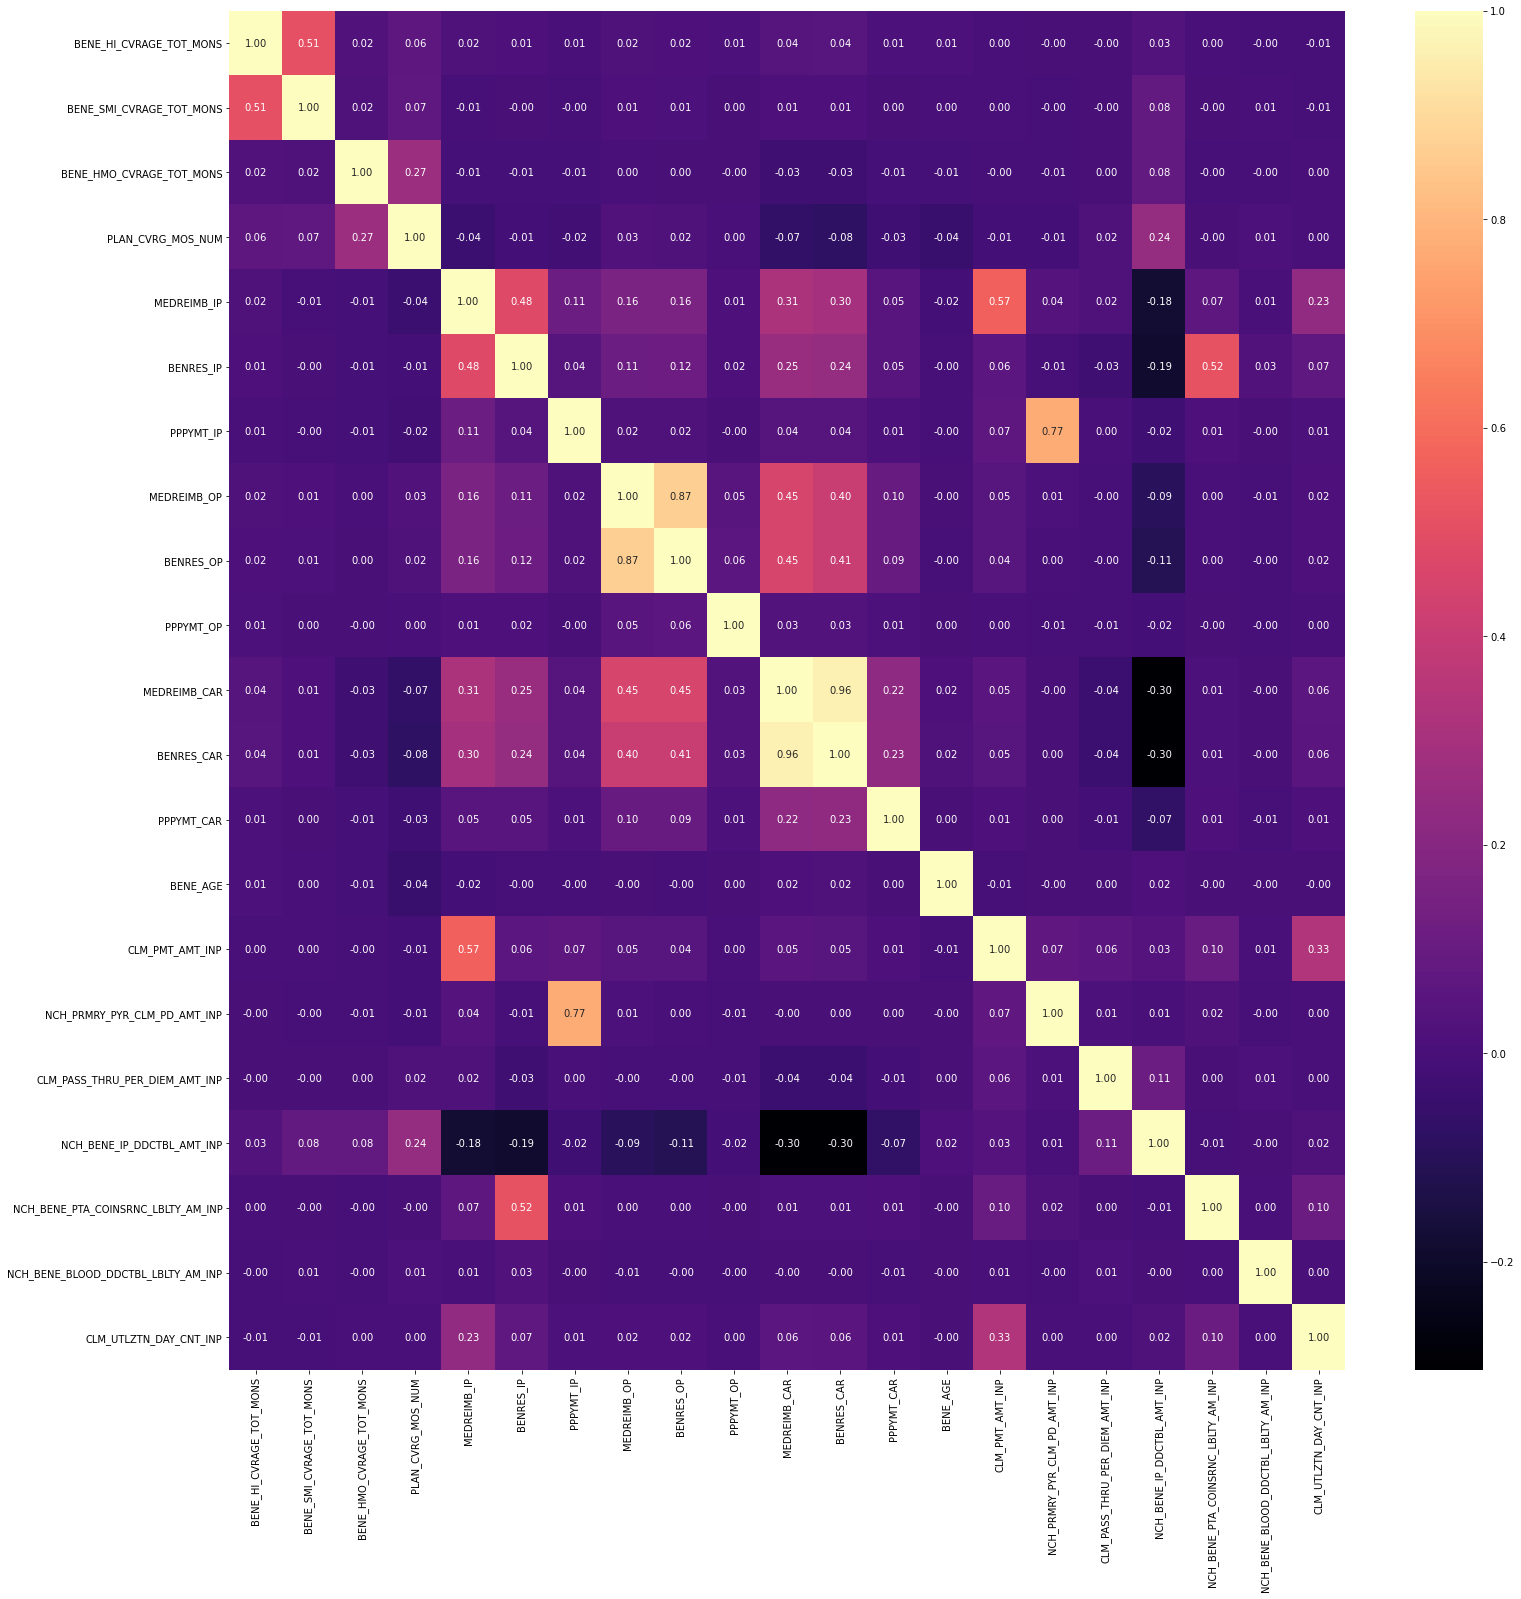

In [136]:
plt.figure(figsize=(25, 25))
sns.heatmap(
    X_train.select_dtypes(include="number").corr(), annot=True, fmt=".2f", cmap="magma"
)
# plt.show()
# #%%
# distribution_age = pd.crosstab(
#     pd.cut(df["BENE_AGE"], bins=5, labels=["25-40", "40-55", "55-70", "70-85", "85+"]),
#     df["Readmission_within_30days_INP"],
#     normalize="index",
# )


# #%%
# plt.figure(figsize=(10, 7))
# sns.barplot(distribution_age.index, distribution_age[1])
# sns.barplot(distribution_age.index, distribution_age[0])
# plt.xticks(rotation=90)



In [137]:
# # Very high correlation between ('BENRES_OP', 'MEDREIMB_OP') & ('BENRES_CAR', 'MEDREIMB_CAR') hence dropping one column in the pair

X_train.drop(columns=["MEDREIMB_OP", "MEDREIMB_CAR"], inplace=True)
X_test.drop(columns=["MEDREIMB_OP", "MEDREIMB_CAR"], inplace=True)



c:\machinelearning\datascience\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [138]:
X_train.columns



Index(['DESYNPUF_ID', 'BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'BENE_ESRD_IND',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'BENRES_OP', 'PPPYMT_OP',
       'BENRES_CAR', 'PPPYMT_CAR', 'BENE_AGE', 'BENE_STATE_COUNTY_CODE',
       'CLM_PMT_AMT_INP', 'NCH_PRMRY_PYR_CLM_PD_AMT_INP',
       'CLM_PASS_THRU_PER_DIEM_AMT_INP', 'NCH_BENE_IP_DDCTBL_AMT_INP',
       'NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP',
       'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP', 'CLM_UTLZTN_DAY_CNT_INP',
       'PRVDR_NUM_CAT_INP', 'ADMTNG_ICD9_DGNS_CD_CAT_INP',
       'ICD9_DGNS_CD_1_CAT_INP', 'ICD9_DGNS_CD_2_CAT_INP',
       'ICD9_DGNS_CD_3_CAT_INP', 'ICD9_DGNS_CD_4_CAT_INP',
       'ICD9_DGNS_CD_5_CAT_INP', 'ICD9_DGNS_CD_6_CAT_INP',
       'ICD9_DG

In [139]:

for c in categorical_features:
    ct.TestIndependence(c, "Readmission_within_30days_INP")



BENE_SEX_IDENT_CD is NOT an important predictor. (Discard BENE_SEX_IDENT_CD from model)
BENE_RACE_CD is NOT an important predictor. (Discard BENE_RACE_CD from model)
BENE_ESRD_IND is IMPORTANT for Prediction
SP_ALZHDMTA is IMPORTANT for Prediction
SP_CHF is IMPORTANT for Prediction
SP_CHRNKIDN is IMPORTANT for Prediction
SP_CNCR is IMPORTANT for Prediction
SP_COPD is IMPORTANT for Prediction
SP_DEPRESSN is IMPORTANT for Prediction
SP_DIABETES is IMPORTANT for Prediction
SP_ISCHMCHT is IMPORTANT for Prediction
SP_OSTEOPRS is IMPORTANT for Prediction
SP_RA_OA is IMPORTANT for Prediction
SP_STRKETIA is IMPORTANT for Prediction
BENE_STATE_COUNTY_CODE is IMPORTANT for Prediction
PRVDR_NUM_CAT_INP is IMPORTANT for Prediction
ADMTNG_ICD9_DGNS_CD_CAT_INP is IMPORTANT for Prediction
ICD9_DGNS_CD_1_CAT_INP is IMPORTANT for Prediction
ICD9_DGNS_CD_2_CAT_INP is IMPORTANT for Prediction
ICD9_DGNS_CD_3_CAT_INP is IMPORTANT for Prediction
ICD9_DGNS_CD_4_CAT_INP is IMPORTANT for Prediction
ICD9_DGNS_C

In [140]:
# X_train.drop(columns=ct.dfIrreleventCols, inplace=True)
# X_test.drop(columns=ct.dfIrreleventCols, inplace=True)



In [141]:
categorical_features = list(X_train.select_dtypes(include="category").columns)
numerical_feature = list(X_train.select_dtypes(include="number").columns)



In [142]:
X_train.columns
X_test.columns



Index(['DESYNPUF_ID', 'BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'BENE_ESRD_IND',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'BENRES_OP', 'PPPYMT_OP',
       'BENRES_CAR', 'PPPYMT_CAR', 'BENE_AGE', 'BENE_STATE_COUNTY_CODE',
       'CLM_PMT_AMT_INP', 'NCH_PRMRY_PYR_CLM_PD_AMT_INP',
       'CLM_PASS_THRU_PER_DIEM_AMT_INP', 'NCH_BENE_IP_DDCTBL_AMT_INP',
       'NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP',
       'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP', 'CLM_UTLZTN_DAY_CNT_INP',
       'PRVDR_NUM_CAT_INP', 'ADMTNG_ICD9_DGNS_CD_CAT_INP',
       'ICD9_DGNS_CD_1_CAT_INP', 'ICD9_DGNS_CD_2_CAT_INP',
       'ICD9_DGNS_CD_3_CAT_INP', 'ICD9_DGNS_CD_4_CAT_INP',
       'ICD9_DGNS_CD_5_CAT_INP', 'ICD9_DGNS_CD_6_CAT_INP',
       'ICD9_DG

Index(['DESYNPUF_ID', 'BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'BENE_ESRD_IND',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'BENRES_OP', 'PPPYMT_OP',
       'BENRES_CAR', 'PPPYMT_CAR', 'BENE_AGE', 'BENE_STATE_COUNTY_CODE',
       'CLM_PMT_AMT_INP', 'NCH_PRMRY_PYR_CLM_PD_AMT_INP',
       'CLM_PASS_THRU_PER_DIEM_AMT_INP', 'NCH_BENE_IP_DDCTBL_AMT_INP',
       'NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP',
       'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP', 'CLM_UTLZTN_DAY_CNT_INP',
       'PRVDR_NUM_CAT_INP', 'ADMTNG_ICD9_DGNS_CD_CAT_INP',
       'ICD9_DGNS_CD_1_CAT_INP', 'ICD9_DGNS_CD_2_CAT_INP',
       'ICD9_DGNS_CD_3_CAT_INP', 'ICD9_DGNS_CD_4_CAT_INP',
       'ICD9_DGNS_CD_5_CAT_INP', 'ICD9_DGNS_CD_6_CAT_INP',
       'ICD9_DG

In [143]:
# Preprocessing objects
std_scalar = StandardScaler()
min_max_scalar = MinMaxScaler()
onehot_encoder = OneHotEncoder(drop="first", sparse=False)
median_imputer = SimpleImputer(strategy="median", missing_values=np.nan)
constant_imputer = SimpleImputer(
    strategy="constant", fill_value=MISSING_VALUE_LABEL, missing_values=np.nan
)
ordinal_encoder = OrdinalEncoder()



In [144]:
numerical_cachedir = mkdtemp()
numerical_memory = Memory(location=numerical_cachedir, verbose=10)
catergorical_cachedir = mkdtemp()
categorical_memory = Memory(location=numerical_cachedir, verbose=10)



In [145]:
numerical_transformer = Pipeline(
    steps=[("imputer_with_medium", median_imputer), ("scaler", std_scalar)],
    verbose=True,
    memory=numerical_memory,
)



In [146]:
categorical_transformer = Pipeline(
    steps=[
        ("imputer_with_constant", constant_imputer),
        (
            "infrequent_category_remover",
            CardinalityReducer(
                cutt_off=INFREQUENT_CATEGORY_CUT_OFF, label=INFREQUENT_CATEGORY_LABEL
            ),
        ),
        ("onehot", onehot_encoder),
    ],
    verbose=True,
    memory=categorical_memory,
)



In [147]:
ord_categorical_transformer = Pipeline(
    steps=[
        ("imputer_with_constant", constant_imputer),
        (
            "infrequent_category_remover",
            CardinalityReducer(
                cutt_off=INFREQUENT_CATEGORY_CUT_OFF, label=INFREQUENT_CATEGORY_LABEL
            ),
        ),
        ("ordinal", ordinal_encoder),
    ],
    verbose=True,
    memory=categorical_memory,
)



In [148]:
preprocessing_pipeline = ColumnTransformer(
    [
        ("categorical", ord_categorical_transformer, categorical_features),
        ("numerical", numerical_transformer, numerical_feature),
    ],
    remainder="drop",
    verbose=True,
)



In [149]:
X_train_transformed = preprocessing_pipeline.fit_transform(X_train)
X_test_transformed = preprocessing_pipeline.transform(X_test)



________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(SimpleImputer(fill_value='Missing', strategy='constant'),       BENE_SEX_IDENT_CD BENE_RACE_CD BENE_ESRD_IND SP_ALZHDMTA SP_CHF  \
31902                 2            1             0           2      1   
10239                 1            2             0           2      1   
42450                 2            3             0           2      2   
10578                 1            1             0           2      1   
45924                 1            1             Y           1      1   
...                 ...          ...           ...         ...    ...   
30873                 2            1             Y           1      1   
37023                 1            1             0           2      2   
16900                 2            1       ..., 
None, None, message_clsname='Pipeline', message='(step 1 of 3) Processing impute

c:\machinelearning\datascience\lib\site-packages\sklearn\pipeline.py:296: UserWarning:

Persisting input arguments took 2.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.



________________________________________________fit_transform_one - 6.2s, 0.1min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.2s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=  12.5s
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(SimpleImputer(strategy='median'),        BENE_HI_CVRAGE_TOT_MONS  BENE_SMI_CVRAGE_TOT_MONS  \
31902                       12                        12   
10239                       12                        12   
42450                       12                        12   
10578                       12                        12   
45924                       12                        12   
...                        ...                       ...   
30873                       12                        12   
37023                       12                        12   
16900                       12                 

In [150]:
X_train_transformed = pd.DataFrame(
    X_train_transformed, columns=get_ct_feature_names(preprocessing_pipeline)
)
X_test_transformed = pd.DataFrame(
    X_test_transformed, columns=get_ct_feature_names(preprocessing_pipeline)
)



In [151]:
X_train_transformed.head()



,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,...,BENRES_CAR,PPPYMT_CAR,BENE_AGE,CLM_PMT_AMT_INP,NCH_PRMRY_PYR_CLM_PD_AMT_INP,CLM_PASS_THRU_PER_DIEM_AMT_INP,NCH_BENE_IP_DDCTBL_AMT_INP,NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP,CLM_UTLZTN_DAY_CNT_INP
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,-0.426826,0.500976,0.639404,-0.488821,-0.106911,-0.394262,0.288968,-0.084186,-0.037934,-0.403799
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.136093,0.024597,-0.666472,-0.598592,-0.106911,-0.394262,0.288968,-0.084186,-0.037934,0.296483
2,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,-0.935268,-0.292988,0.101690,0.828428,-0.106911,-0.394262,1.380789,-0.084186,-0.037934,0.821695
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,-0.753681,-0.292988,0.255323,-0.708363,-0.106911,-0.394262,0.288968,-0.084186,-0.037934,-0.753941
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.681047,-0.292988,0.485771,-0.159509,-0.106911,3.553934,0.288968,-0.084186,-0.037934,-0.228729


In [152]:
y_train = y_train.reset_index().drop(columns="index", axis=1).values.ravel()
y_test = y_test.reset_index().drop(columns="index", axis=1).values.ravel()


In [153]:
lr = LogisticRegression(random_state=RANDOM_STATE)
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight="balanced")
gnb = GaussianNB()
rfc = RandomForestClassifier(class_weight="balanced", random_state=RANDOM_STATE)



In [154]:
num_folds = 5
seed = 7
scoring = "f1"
models = []
models.append(("LR", lr))
models.append(("LDA", lda))
models.append(("KNN", knn))
models.append(("CART", dt))
models.append(("NB", gnb))



In [155]:
smt = SMOTE(random_state=RANDOM_STATE, n_jobs=-1)
random_oversampling = RandomOverSampler(random_state=RANDOM_STATE)



In [156]:
dt_pipeline = Pipeline(
    [
        # ("Select Relevent Columns", SelectColumnsTransfomer(columns=numerical_feature + ct.dfReleventCols)),
        ("Preprocessing Step", preprocessing_pipeline),
        ("DT_Classifier", dt),
    ]
)



In [157]:
dt_smote_pipeline = imb_pipeline.Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("SMOTE Sampling", smt),
        ("Classifier", DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ]
)

dt_randover_pipeline = imb_pipeline.Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("Random OverSampling", random_oversampling),
        ("Classifier", DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ]
)



In [158]:
def getMetricsData(y_true, y_pred):
    print(f"Accuracy score is {accuracy_score(y_true, y_pred)}")
    print(f"Precision score is {precision_score(y_true, y_pred)}")
    print(f"Recall score is {recall_score(y_true, y_pred)}")
    print(f"F1 score is {f1_score(y_true, y_pred)}")
    print(f"AUC ROC score is {roc_auc_score(y_true, y_pred)}")
    print(f"Classification Report is \n {classification_report(y_true, y_pred)}")
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues", fmt="d")
    plt.show()



In [159]:
def fit_predict(pipeline):
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{"="*40} {pipeline.steps[-1][-1]} {"="*50}')
    print(f'{"="*40} {"Training Metrics"} {"="*50}')
    getMetricsData(y_train, model.predict(X_train))
    print(f'{"="*40} {"Testing Metrics"} {"="*50}')
    getMetricsData(y_test, y_pred)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(SimpleImputer(fill_value='Missing', strategy='constant'),       BENE_SEX_IDENT_CD BENE_RACE_CD BENE_ESRD_IND SP_ALZHDMTA SP_CHF  \
31902                 2            1             0           2      1   
10239                 1            2             0           2      1   
42450                 2            3             0           2      2   
10578                 1            1             0           2      1   
45924                 1            1             Y           1      1   
...                 ...          ...           ...         ...    ...   
30873                 2            1             Y           1      1   
37023                 1            1             0           2      2   
16900                 2            1       ..., 
array([0, ..., 0], dtype=int64), None, message_clsname='Pipeline', message='(ste

c:\machinelearning\datascience\lib\site-packages\sklearn\pipeline.py:296: UserWarning:

Persisting input arguments took 2.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.



________________________________________________fit_transform_one - 6.2s, 0.1min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.1s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=  11.9s
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(SimpleImputer(strategy='median'),        BENE_HI_CVRAGE_TOT_MONS  BENE_SMI_CVRAGE_TOT_MONS  \
31902                       12                        12   
10239                       12                        12   
42450                       12                        12   
10578                       12                        12   
45924                       12                        12   
...                        ...                       ...   
30873                       12                        12   
37023                       12                        12   
16900                       12                 

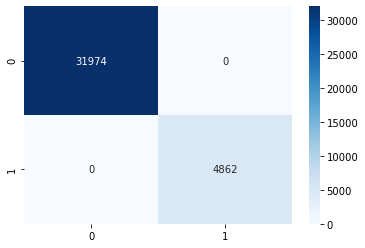

======================================== Testing Metrics ==================================================
Accuracy score is 0.857871878393051
Precision score is 0.48514851485148514
Recall score is 0.46190102120974075
F1 score is 0.4732394366197183
AUC ROC score is 0.6916409477977644
Classification Report is 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      7937
           1       0.49      0.46      0.47      1273

    accuracy                           0.86      9210
   macro avg       0.70      0.69      0.70      9210
weighted avg       0.86      0.86      0.86      9210



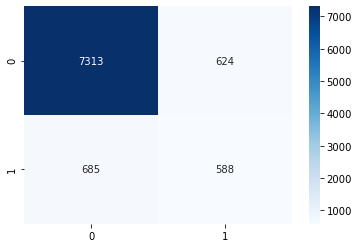

In [160]:
fit_predict(dt_pipeline)

In [161]:
feature_importance = FeatureImportance(dt_pipeline)
feature_importance.plot(top_n_features=50, width=1000)



[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]2.9s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.1s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   3.1s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

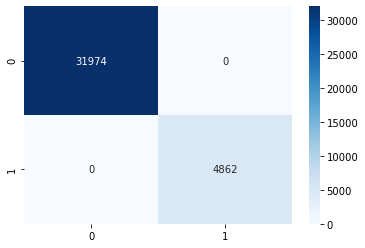

======================================== Testing Metrics ==================================================
Accuracy score is 0.8585233441910967
Precision score is 0.48875562218890556
Recall score is 0.5121759622937941
F1 score is 0.5001917913310319
AUC ROC score is 0.7131246448737459
Classification Report is 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      7937
           1       0.49      0.51      0.50      1273

    accuracy                           0.86      9210
   macro avg       0.70      0.71      0.71      9210
weighted avg       0.86      0.86      0.86      9210



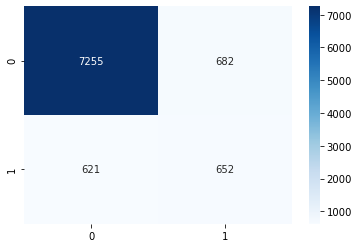

In [162]:
fit_predict(dt_smote_pipeline)



In [163]:
feature_importance = FeatureImportance(dt_smote_pipeline)
feature_importance.plot(top_n_features=50, width=1000)



[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]2.4s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.1s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   2.6s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

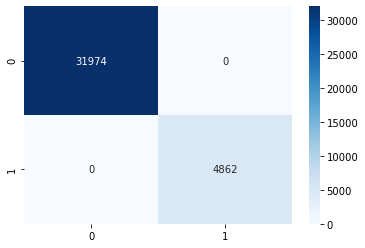

======================================== Testing Metrics ==================================================
Accuracy score is 0.852442996742671
Precision score is 0.4644039735099338
Recall score is 0.44069128043990574
F1 score is 0.4522370012091898
AUC ROC score is 0.6795871672452773
Classification Report is 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      7937
           1       0.46      0.44      0.45      1273

    accuracy                           0.85      9210
   macro avg       0.69      0.68      0.68      9210
weighted avg       0.85      0.85      0.85      9210



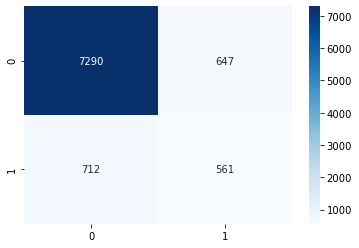

In [164]:
fit_predict(dt_randover_pipeline)



In [165]:
parameter_grid = {
    "DT_Classifier__max_depth": np.linspace(1, 32, 32, endpoint=True),
    "DT_Classifier__min_samples_leaf": np.linspace(0.1, 0.5, 5, endpoint=True),
    "DT_Classifier__min_samples_split": np.linspace(0.1, 1.0, 10, endpoint=True),
    "DT_Classifier__max_features": ["auto", "log2", None],
}



In [166]:
rand_grid_search = RandomizedSearchCV(
    estimator=dt_pipeline,
    param_distributions=parameter_grid,
    n_iter=15,
    scoring="f1",
    verbose=4,
)


In [167]:
extratrees_clf = ExtraTreesClassifier(
    max_features=0.7363742386320187,
    n_estimators=80,
    n_jobs=-1,
    random_state=4,
    verbose=False,
)



In [168]:
extratrees_clf_pipeline = Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("Extratrees_Classifier", extratrees_clf),
    ]
)



[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]2.4s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.1s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   2.6s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

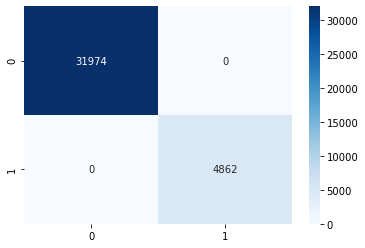

======================================== Testing Metrics ==================================================
Accuracy score is 0.9033659066232356
Precision score is 0.8438061041292639
Recall score is 0.3692065985860173
F1 score is 0.5136612021857924
AUC ROC score is 0.679122639093941
Classification Report is 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7937
           1       0.84      0.37      0.51      1273

    accuracy                           0.90      9210
   macro avg       0.88      0.68      0.73      9210
weighted avg       0.90      0.90      0.89      9210



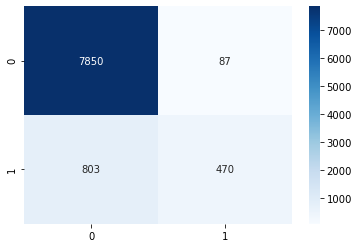

In [169]:
fit_predict(extratrees_clf_pipeline)



In [170]:
rfc_model_1 = RandomForestClassifier(
    bootstrap=False,
    max_features=0.40810278517436016,
    n_estimators=73,
    n_jobs=-1,
    random_state=1,
    verbose=False,
)



In [171]:
rfc_clf_pipeline = Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("Extratrees_Classifier", rfc_model_1),
    ]
)



[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]2.6s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.1s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   2.8s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

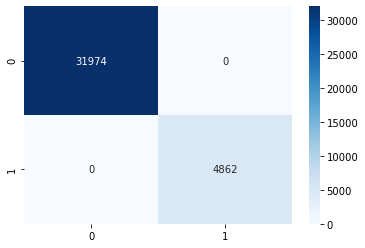

======================================== Testing Metrics ==================================================
Accuracy score is 0.9061889250814332
Precision score is 0.8460236886632826
Recall score is 0.3927729772191673
F1 score is 0.536480686695279
AUC ROC score is 0.6906538440335473
Classification Report is 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7937
           1       0.85      0.39      0.54      1273

    accuracy                           0.91      9210
   macro avg       0.88      0.69      0.74      9210
weighted avg       0.90      0.91      0.89      9210



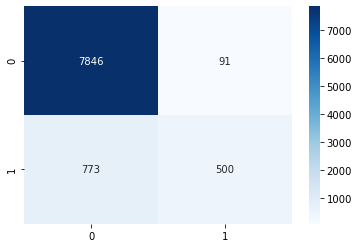

In [172]:
fit_predict(rfc_clf_pipeline)



In [173]:
extratrees_smt_pipeline = imb_pipeline.Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("SMOTE oversampling", smt),
        ("Extratrees_Classifier", extratrees_clf),
    ]
)

extratrees_randover_pipeline = imb_pipeline.Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("Random oversampling", random_oversampling),
        ("Extratrees_Classifier", extratrees_clf),
    ]
)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]2.5s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.1s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   2.8s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

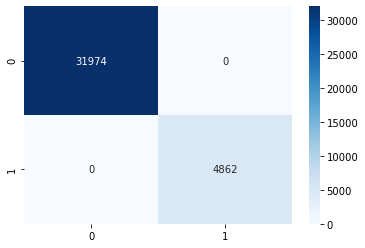

======================================== Testing Metrics ==================================================
Accuracy score is 0.9057546145494029
Precision score is 0.827140549273021
Recall score is 0.40219952867242736
F1 score is 0.5412262156448203
AUC ROC score is 0.6943591822523029
Classification Report is 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7937
           1       0.83      0.40      0.54      1273

    accuracy                           0.91      9210
   macro avg       0.87      0.69      0.74      9210
weighted avg       0.90      0.91      0.89      9210



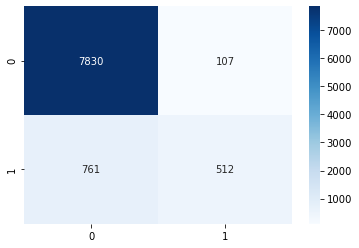

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]2.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.1s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   2.6s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

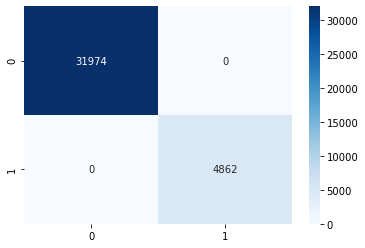

======================================== Testing Metrics ==================================================
Accuracy score is 0.8971769815418024
Precision score is 0.8381742738589212
Recall score is 0.3173605655930872
F1 score is 0.46039886039886035
AUC ROC score is 0.6537665874456553
Classification Report is 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7937
           1       0.84      0.32      0.46      1273

    accuracy                           0.90      9210
   macro avg       0.87      0.65      0.70      9210
weighted avg       0.89      0.90      0.88      9210



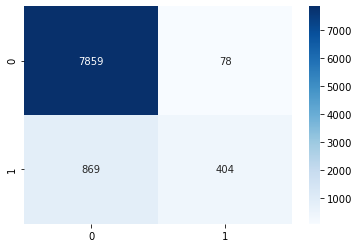

In [174]:
fit_predict(extratrees_smt_pipeline)
fit_predict(extratrees_randover_pipeline)


In [175]:
rfc_smt_pipeline = imb_pipeline.Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("SMOTE oversampling", smt),
        ("Extratrees_Classifier", rfc_model_1),
    ]
)

rfc_randover_pipeline = imb_pipeline.Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("random oversampling", random_oversampling),
        ("Extratrees_Classifier", rfc_model_1),
    ]
)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]2.5s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.1s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   2.7s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

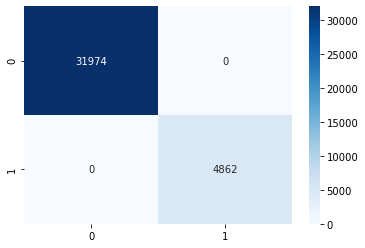

======================================== Testing Metrics ==================================================
Accuracy score is 0.9130293159609121
Precision score is 0.8361823361823362
Recall score is 0.46111547525530244
F1 score is 0.5944303797468355
AUC ROC score is 0.7233131867898032
Classification Report is 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      7937
           1       0.84      0.46      0.59      1273

    accuracy                           0.91      9210
   macro avg       0.88      0.72      0.77      9210
weighted avg       0.91      0.91      0.90      9210



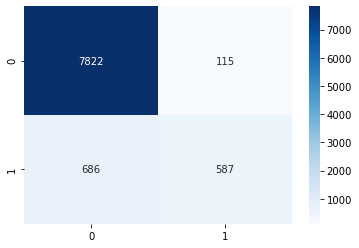

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]2.4s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.1s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   2.6s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

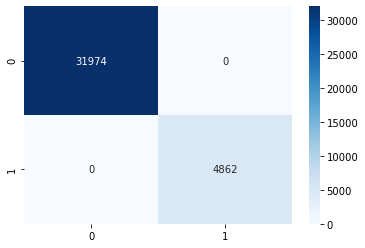

======================================== Testing Metrics ==================================================
Accuracy score is 0.8998914223669924
Precision score is 0.8084358523725835
Recall score is 0.36135113904163396
F1 score is 0.49945711183496205
AUC ROC score is 0.6738089952484219
Classification Report is 
               precision    recall  f1-score   support

           0       0.91      0.99      0.94      7937
           1       0.81      0.36      0.50      1273

    accuracy                           0.90      9210
   macro avg       0.86      0.67      0.72      9210
weighted avg       0.89      0.90      0.88      9210



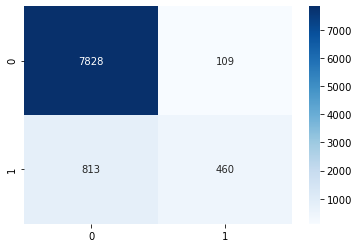

In [176]:
fit_predict(rfc_smt_pipeline)
fit_predict(rfc_randover_pipeline)


In [177]:
estimators = [
    ("dt_pipeline", dt_pipeline),
    ("rfc_pipeline", rfc_clf_pipeline),
    ("extratrees_pipeline", extratrees_clf_pipeline),
]



In [178]:
voting_clf = VotingClassifier(
    estimators=estimators, voting="soft", verbose=True, n_jobs=-1
)



In [179]:
voting_clf.fit(X_train, y_train)



VotingClassifier(estimators=[('dt_pipeline',
                              Pipeline(steps=[('Preprocessing Step',
                                               ColumnTransformer(transformers=[('categorical',
                                                                                Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib),
                                                                                         steps=[('imputer_with_constant',
                                                                                                 SimpleImputer(fill_value='Missing',
                                                                                                               strategy='constant')),
                                                                                                ('infrequent_category_remover',
                                                                                                 Cardina

In [180]:
y_pred = voting_clf.predict(X_test)



Accuracy score is 0.889685124864278
Precision score is 0.6546329723225031
Recall score is 0.42733699921445406
F1 score is 0.5171102661596959
AUC ROC score is 0.6955886205597279
Classification Report is 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      7937
           1       0.65      0.43      0.52      1273

    accuracy                           0.89      9210
   macro avg       0.78      0.70      0.73      9210
weighted avg       0.88      0.89      0.88      9210



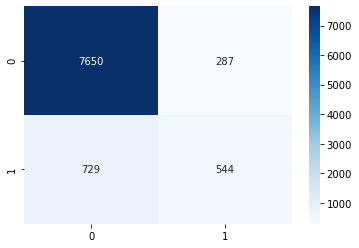

In [181]:
getMetricsData(y_true=y_test, y_pred=y_pred)



In [182]:
from hpsklearn import (
    HyperoptEstimator,
    extra_trees,
    random_forest,xgboost_classification, any_classifier
)
from hyperopt import tpe


In [183]:
estim_extratrees = HyperoptEstimator(
    classifier=extra_trees("extratrees_clf"),
    preprocessing=[],
    algo=tpe.suggest,
    max_evals=10,
    trial_timeout=600,
)

estim_extratrees.fit(X_train_transformed.to_numpy(), y_train)

estim_extratrees.score(X_test_transformed.to_numpy(), y_test)

estim_extratrees.best_model()["learner"]

100%|███████████████████████████████████████████████| 10/10 [00:02<00:00,  2.47s/trial, best loss: 0.10002714440825189]


0.894028230184582

ExtraTreesClassifier(max_features=0.9883164239821786, min_samples_leaf=5,
                     n_estimators=14, n_jobs=1, random_state=0, verbose=False)

In [196]:
extratree_hp_pipeline = Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("Extratrees_Classifier", ExtraTreesClassifier(max_features=0.9883164239821786, min_samples_leaf=5,
                     n_estimators=14, n_jobs=1, random_state=0, verbose=False)),
    ]
)

# ExtraTreesClassifier(bootstrap=True, criterion='entropy',
#                      max_features=0.49408687452249067, n_estimators=109,
#                      n_jobs=1, random_state=3, verbose=1, class_weight="balanced",)

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]3.6s, 0.1min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.3s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   4.0s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

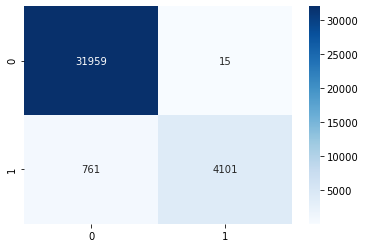

======================================== Testing Metrics ==================================================
Accuracy score is 0.894028230184582
Precision score is 0.751269035532995
Recall score is 0.3487824037706206
F1 score is 0.47639484978540775
AUC ROC score is 0.6651307760317132
Classification Report is 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7937
           1       0.75      0.35      0.48      1273

    accuracy                           0.89      9210
   macro avg       0.83      0.67      0.71      9210
weighted avg       0.88      0.89      0.88      9210



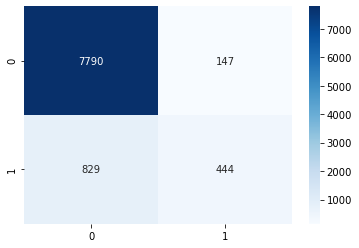

In [197]:
fit_predict(extratree_hp_pipeline)

In [198]:
extratrees_smt_pipeline = imb_pipeline.Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("SMOTE oversampling", smt),
        ("Extratrees_Classifier", ExtraTreesClassifier(max_features=0.9883164239821786, min_samples_leaf=5,
                     n_estimators=14, n_jobs=1, random_state=0, verbose=False)),
    ]
)


extratrees_randover_pipeline = imb_pipeline.Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("Random oversampling", random_oversampling),
        ("Extratrees_Classifier", ExtraTreesClassifier(max_features=0.9883164239821786, min_samples_leaf=5,
                     n_estimators=14, n_jobs=1, random_state=0, verbose=False)),
    ]
)

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]2.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.1s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   2.5s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

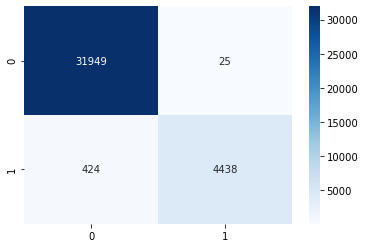

======================================== Testing Metrics ==================================================
Accuracy score is 0.8921824104234528
Precision score is 0.6881720430107527
Recall score is 0.40219952867242736
F1 score is 0.5076846802181457
AUC ROC score is 0.6864846704720333
Classification Report is 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7937
           1       0.69      0.40      0.51      1273

    accuracy                           0.89      9210
   macro avg       0.80      0.69      0.72      9210
weighted avg       0.88      0.89      0.88      9210



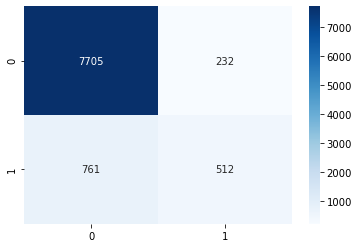

In [199]:
fit_predict(extratrees_smt_pipeline)

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]2.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.1s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   2.4s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

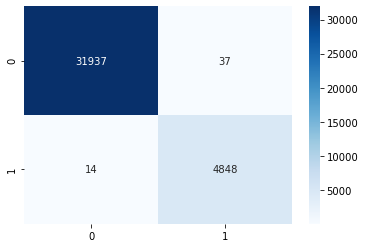

======================================== Testing Metrics ==================================================
Accuracy score is 0.884799131378936
Precision score is 0.603515625
Recall score is 0.48546739984289083
F1 score is 0.5380931649978232
AUC ROC score is 0.7171572856591297
Classification Report is 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      7937
           1       0.60      0.49      0.54      1273

    accuracy                           0.88      9210
   macro avg       0.76      0.72      0.74      9210
weighted avg       0.88      0.88      0.88      9210



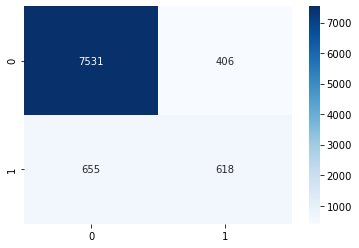

In [201]:
fit_predict(extratrees_randover_pipeline)

In [186]:
estim_rfc = HyperoptEstimator(
    classifier=random_forest("rfc_clf"),
    preprocessing=[],
    algo=tpe.suggest,
    max_evals=10,
    trial_timeout=600,
)

estim_rfc.fit(X_train_transformed.to_numpy(), y_train)

estim_rfc.score(X_test_transformed.to_numpy(), y_test)

estim_rfc.best_model()["learner"]

100%|████████████████████████████████████████████████| 10/10 [00:11<00:00, 11.36s/trial, best loss: 0.0912052117263844]


0.9066232356134636

RandomForestClassifier(bootstrap=False, max_features=0.440238968203593,
                       n_estimators=88, n_jobs=1, random_state=3,
                       verbose=False)

In [190]:
rfc_hp_pipeline = Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("RandomForest_Classifier", RandomForestClassifier(bootstrap=False, max_features=0.440238968203593,
                       n_estimators=88, n_jobs=1, random_state=3,
                       verbose=False)),
    ]
)

# RandomForestClassifier(bootstrap=False, max_features=0.3420586570483586,
#                        n_estimators=133, n_jobs=1, random_state=0,
#                        verbose=False)

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]5.4s, 0.1min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.2s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   5.7s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

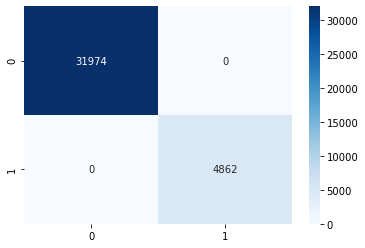

======================================== Testing Metrics ==================================================
Accuracy score is 0.9066232356134636
Precision score is 0.8680926916221033
Recall score is 0.38256087981146897
F1 score is 0.5310796074154853
AUC ROC score is 0.686618728931815
Classification Report is 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7937
           1       0.87      0.38      0.53      1273

    accuracy                           0.91      9210
   macro avg       0.89      0.69      0.74      9210
weighted avg       0.90      0.91      0.89      9210



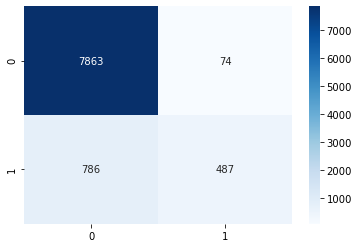

In [191]:
fit_predict(rfc_hp_pipeline)

In [192]:
rfc_smote_pipeline = imb_pipeline.Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("Smote Sampling", smt),
        ("RandomForest_Classifier", RandomForestClassifier(bootstrap=False, max_features=0.440238968203593,
                       n_estimators=88, n_jobs=1, random_state=3,
                       verbose=False)),
    ]
)

# RandomForestClassifier(bootstrap=False, max_features=0.3420586570483586,
#                        n_estimators=133, n_jobs=1, random_state=0,
#                        verbose=False)

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]7.2s, 0.1min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.5s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   7.9s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

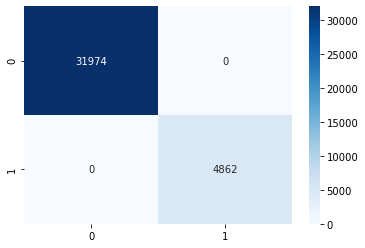

======================================== Testing Metrics ==================================================
Accuracy score is 0.9145494028230184
Precision score is 0.8491379310344828
Recall score is 0.4642576590730558
F1 score is 0.6003047232097511
AUC ROC score is 0.7255142396411015
Classification Report is 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      7937
           1       0.85      0.46      0.60      1273

    accuracy                           0.91      9210
   macro avg       0.88      0.73      0.78      9210
weighted avg       0.91      0.91      0.90      9210



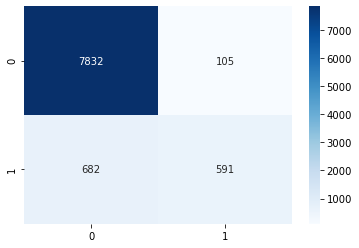

In [202]:
fit_predict(rfc_smote_pipeline)

In [194]:
rfc_randover_pipeline = imb_pipeline.Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("Smote Sampling", random_oversampling),
        ("RandomForest_Classifier", RandomForestClassifier(bootstrap=False, max_features=0.440238968203593,
                       n_estimators=88, n_jobs=1, random_state=3,
                       verbose=False)),
    ]
)

# RandomForestClassifier(bootstrap=False, max_features=0.3420586570483586,
#                        n_estimators=133, n_jobs=1, random_state=0,
#                        verbose=False)

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\d4a670e7912a5b6ccefaaf43662ef902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]2.5s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\a5524cd9a1f321c3b97ce6b0519064aa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ........... (step 3 of 3) Processing ordinal, total=   0.1s
[ColumnTransformer] ... (1 of 2) Processing categorical, total=   2.8s
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SAURAB~1\AppData\Local\Temp\tmprhxswfwu\joblib\sklearn\pipeline\_fit_transform_one\bf548c27c1a9d7a12cc73a0333f28c09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   

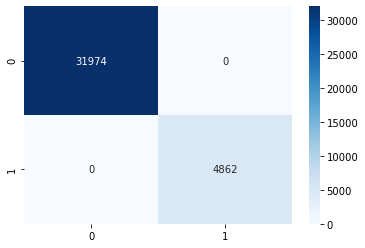

======================================== Testing Metrics ==================================================
Accuracy score is 0.899457111834962
Precision score is 0.8160291438979964
Recall score is 0.3519245875883739
F1 score is 0.4917672886937431
AUC ROC score is 0.669599688275729
Classification Report is 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7937
           1       0.82      0.35      0.49      1273

    accuracy                           0.90      9210
   macro avg       0.86      0.67      0.72      9210
weighted avg       0.89      0.90      0.88      9210



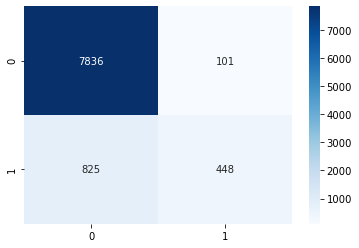

In [195]:
fit_predict(rfc_randover_pipeline)